In [70]:
from obspy.taup import plot_travel_times
from obspy.taup import TauPyModel
import matplotlib.pyplot as plt
import numpy as np
model = TauPyModel(model="iasp91")

There were 0 epicentral distances without an arrival


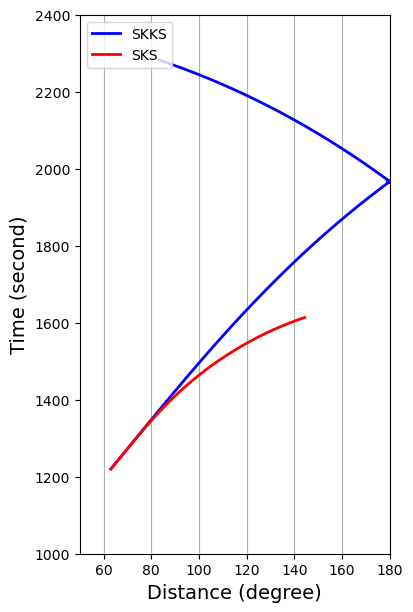

In [2]:
fig, ax = plt.subplots(figsize=(4, 7))
ax = plot_travel_times(source_depth=100, phase_list=["SKS", "SKKS"],
                       ax=ax, fig=fig, verbose=True, legend=True)
# fig.savefig('TravelTime.png',dpi=200)
# fig.savefig('TravelTime.pdf',dpi=200)

In [170]:
phase_list = ['PS', 'S','sS', 'sSKS', 'SKKS', 'sSKKS', 'ScS','sScS', 'SKiKS']
depth = 300

In [171]:
phase_ref = {'PS':[],
            'S':[],
            'sSKS':[],
            'SKKS':[],
            'sSKKS':[],
            'ScS':[],
            'sS':[],
            'sScS':[],
            'SKiKS':[],
            'PS_tri':[],
            }
PS_tri_dist=[]

for dist in range(64,111,1):
    templist = []
    SKS_arr= model.get_travel_times(source_depth_in_km=depth, phase_list=['SKS'], 
                                  distance_in_degree=dist)
    SKS_time = SKS_arr[0].time
    arrivals = model.get_travel_times(source_depth_in_km=depth, phase_list=phase_list, 
                                  distance_in_degree=dist)
    for arr in arrivals:
        phase = arr.name
        arr_time = arr.time
        ref_time = arr.time-SKS_time
        if phase in templist:
            if phase =='PS':
                phase_ref['PS_tri'].append(ref_time)
                PS_tri_dist.append(dist)
            elif arr_time>2000:
                pass
        else:
            phase_ref[phase].append(ref_time)
        
        templist.append(phase)
    
    lackphase = [x for x in phase_list if x not in templist]
    if len(lackphase) > 0:
        for j in lackphase:
            # print(j)
            phase_ref[j].append(np.nan)
        
        
        

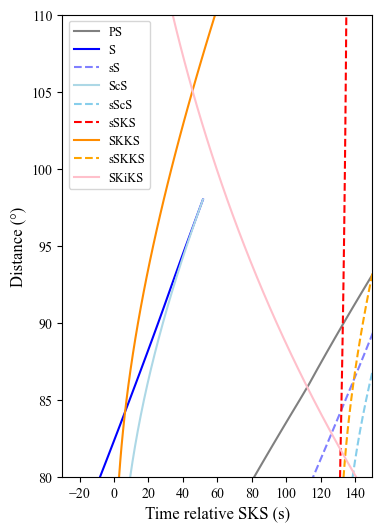

In [172]:
plt.figure(figsize=(4,6))
plt.rcParams["font.family"] = "Times New Roman"
distrange=range(64,111,1)
plt.plot(phase_ref['PS'],distrange,c='grey', label='PS')
# plt.plot(phase_ref['PS_tri'],PS_tri_dist,c='lightgrey',ls='--')
plt.plot(phase_ref['S'],distrange,c='blue',label='S')
plt.plot(phase_ref['sS'],distrange,c='blue',alpha=0.5,ls='--',label='sS')
plt.plot(phase_ref['ScS'],distrange,c='lightblue',label='ScS')
plt.plot(phase_ref['sScS'],distrange,c='skyblue',ls='--',label='sScS')
plt.plot(phase_ref['sSKS'],distrange,c='red',ls='--',label='sSKS')
plt.plot(phase_ref['SKKS'],distrange,c='darkorange',label='SKKS')
plt.plot(phase_ref['sSKKS'],distrange,c='orange',ls='--',label='sSKKS')

plt.plot(phase_ref['SKiKS'],distrange,c='pink',label='SKiKS')
plt.xticks(range(-60,151,20))
plt.xlim(-30,150)
plt.ylim(80,110)

plt.legend(fontsize=9)
plt.xlabel('Time relative SKS (s)', fontsize=12)
plt.ylabel('Distance (°)', fontsize=12)

plt.savefig(f'RelativeTime_{depth}km.png',dpi=200)
plt.savefig(f'RelativeTime_{depth}km.pdf')

In [173]:
!open .